In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Column descriptions for reference
#id - unique identified for a house
#dateDate - house was sold
#pricePrice - is prediction target
#bedroomsNumber - of Bedrooms/House
#bathroomsNumber - of bathrooms/bedrooms
#sqft_livingsquare - footage of the home
#sqft_lotsquare - footage of the lot
#floorsTotal - floors (levels) in house
#waterfront - House which has a view to a waterfront
#view - Has been viewed/ how many times viewed?
#condition - How good the condition is ( Overall )
#grade - overall grade given to the housing unit, based on King County grading system
#sqft_above - square footage of house apart from basement
#sqft_basement - square footage of the basement
#yr_built - Built Year
#yr_renovated - Year when house was renovated
#zipcode - zip
#lat - Latitude coordinate
#long - Longitude coordinate
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## Looking at the dataset ##

In [3]:
data.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

In [4]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dropping Values & Editing Columns##


#### Looks like the NaN values for waterfront, view, and yr_renovated can be replaced with other values. 
#### - waterfront replaced with 0
#### - view replaced with 0
#### - yr_renovated replaced with yr_built as it may not have ever been renovated

In [5]:
data['waterfront'] = data['waterfront'].fillna(0)
data['view'] = data['view'].fillna(0)
data['yr_renovated'] = data['yr_renovated'].replace(0, np.nan)
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           NaN    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           NaN    98136  47.5208 -122.393           1360        5000  
4     1987           NaN    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [6]:
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_built'])
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955        1955.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933        1933.0    98028  47.7379 -122.233           2720        8062  
3     1965        1965.0    98136  47.5208 -122.393           1360        5000  
4     1987        1987.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
#sorting by date
data = data.sort_values(by = 'date', ascending =False)
display(data.head())
display(data.tail())

id      date      price  bedrooms  bathrooms  sqft_living  \
1013    342000570  9/9/2014   429000.0         2       1.00         1080   
9932   7779200075  9/9/2014   689000.0         2       1.75         2330   
17592  7954300740  9/9/2014   527000.0         4       2.50         2830   
18353  1370803445  9/9/2014  1140000.0         4       1.75         3080   
8113   4006000183  9/9/2014   450000.0         7       4.00         3150   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1013       3600     1.0         0.0   0.0  ...      7        1080   
9932      10143     1.0         0.0   2.0  ...      7        1220   
17592      6163     2.0         0.0   0.0  ...      9        2830   
18353      6500     1.0         0.0   0.0  ...      9        1700   
8113       7800     2.0         0.0   0.0  ...      8        3150   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1013             0.0     1922        1922.0    98122  47.6078 -122.291   
9932          1110.0     1953        1953.0    98146  47.4899 -122.359   
17592            0.0     2000        2000.0    98056  47.5227 -122.190   
18353         1380.0     1941        1941.0    98199  47.6353 -122.402   
8113             0.0     2013        2013.0    98118  47.5259 -122.279   

       sqft_living15  sqft_lot15  
1013            2230        4500  
9932            2560        9750  
17592           2730        6202  
18353           2960        5711  
8113            1880        6000  

[5 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
16071  1433290010  1/12/2015  449000.0         3       2.25         1960   
7946   8682282070  1/12/2015  920000.0         3       3.50         2800   
14571  6672900220  1/12/2015  984000.0         4       2.25         2390   
13533  5088500210  1/12/2015  415000.0         4       2.75         2390   
12076  5437600140  1/10/2015  325000.0         4       2.50         2240   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16071     44634     1.0         0.0   0.0  ...      7        1130   
7946       7694     1.0         0.0   0.0  ...      9        2800   
14571     12292     1.0         0.0   0.0  ...      9        2390   
13533      9968     1.0         0.0   0.0  ...      9        1390   
12076      5105     2.0         0.0   0.0  ...      8        2240   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
16071          830.0     1984        1984.0    98028  47.7769 -122.253   
7946             0.0     2005        2005.0    98053  47.7095 -122.022   
14571            0.0     1962        1962.0    98040  47.5528 -122.221   
13533         1000.0     1989        1989.0    98038  47.3706 -122.056   
12076            0.0     2002        2002.0    98042  47.3922 -122.165   

       sqft_living15  sqft_lot15  
16071           1970       44634  
7946            2420        7694  
14571           2870       12337  
13533           2560       12385  
12076           1920        5288  

[5 rows x 21 columns]

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [25]:
for column in data:
    unique_vals = np.unique(data[column])
    num_values = len(unique_vals)
    if num_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, num_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, num_values))

The number of values for feature id : 21420
The number of values for feature date : 372
The number of values for feature price : 3622
The number of values for feature bedrooms :12 -- [ 1  2  3  4  5  6  7  8  9 10 11 33]
The number of values for feature bathrooms :29 -- [0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5  7.75
 8.  ]
The number of values for feature sqft_living : 1034
The number of values for feature sqft_lot : 9776
The number of values for feature floors :6 -- [1.  1.5 2.  2.5 3.  3.5]
The number of values for feature waterfront :2 -- [0. 1.]
The number of values for feature view :5 -- [0. 1. 2. 3. 4.]
The number of values for feature condition :5 -- [1 2 3 4 5]
The number of values for feature grade :11 -- [ 3  4  5  6  7  8  9 10 11 12 13]
The number of values for feature sqft_above : 942
The number of values for feature sqft_basement : 304
The number of values for feature yr_built :

In [23]:
bed = data[data['bedrooms'] == 33]
bed.head()
#33 bedrooms and 1.75 bathrooms seems a bit off. Maybe a data entry issue

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0         0.0   0.0  ...      7        1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947        1947.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [26]:
base = data[data['sqft_basement'] == '?']
base.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
5757   3904920980 2014-09-09  648000.0         4        2.5         2740   
16685  6306100080 2014-09-09  234950.0         3        2.0         1430   
13673  7211400506 2014-09-08  265000.0         3        2.5         1410   
12893  6909200401 2014-09-08  536500.0         4        2.5         1720   
9715   3904940160 2014-09-04  555000.0         3        2.5         2160   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
5757       9959     2.0         0.0   0.0  ...      9        2740   
16685     10850     1.0         0.0   0.0  ...      7        1430   
13673      2500     2.0         0.0   0.0  ...      7        1410   
12893      3515     2.0         0.0   2.0  ...      8        1470   
9715       7584     2.0         0.0   0.0  ...      8        2160   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
5757               ?     1989        1989.0    98029  47.5672 -122.011   
16685              ?     1994        1994.0    98001  47.2671 -122.233   
13673              ?     2006        2006.0    98146  47.5132 -122.358   
12893              ?     2000        2000.0    98144  47.5910 -122.293   
9715               ?     1988        1988.0    98029  47.5751 -122.014   

       sqft_living15  sqft_lot15  
5757            2630        9905  
16685           1610        8015  
13673           1290        5190  
12893           1140        2208  
9715            2160        7372  

[5 rows x 21 columns]

In [39]:
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)
data.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1013    342000570 2014-09-09   429000.0         2       1.00         1080   
9932   7779200075 2014-09-09   689000.0         2       1.75         2330   
17592  7954300740 2014-09-09   527000.0         4       2.50         2830   
18353  1370803445 2014-09-09  1140000.0         4       1.75         3080   
8113   4006000183 2014-09-09   450000.0         7       4.00         3150   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1013       3600     1.0         0.0   0.0  ...      7        1080   
9932      10143     1.0         0.0   2.0  ...      7        1220   
17592      6163     2.0         0.0   0.0  ...      9        2830   
18353      6500     1.0         0.0   0.0  ...      9        1700   
8113       7800     2.0         0.0   0.0  ...      8        3150   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1013             0.0     1922        1922.0    98122  47.6078 -122.291   
9932          1110.0     1953        1953.0    98146  47.4899 -122.359   
17592            0.0     2000        2000.0    98056  47.5227 -122.190   
18353         1380.0     1941        1941.0    98199  47.6353 -122.402   
8113             0.0     2013        2013.0    98118  47.5259 -122.279   

       sqft_living15  sqft_lot15  
1013            2230        4500  
9932            2560        9750  
17592           2730        6202  
18353           2960        5711  
8113            1880        6000  

[5 rows x 21 columns]

In [38]:
base.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
5757   3904920980 2014-09-09  648000.0         4        2.5         2740   
16685  6306100080 2014-09-09  234950.0         3        2.0         1430   
13673  7211400506 2014-09-08  265000.0         3        2.5         1410   
12893  6909200401 2014-09-08  536500.0         4        2.5         1720   
9715   3904940160 2014-09-04  555000.0         3        2.5         2160   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
5757       9959     2.0         0.0   0.0  ...      9        2740   
16685     10850     1.0         0.0   0.0  ...      7        1430   
13673      2500     2.0         0.0   0.0  ...      7        1410   
12893      3515     2.0         0.0   2.0  ...      8        1470   
9715       7584     2.0         0.0   0.0  ...      8        2160   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
5757               ?     1989        1989.0    98029  47.5672 -122.011   
16685              ?     1994        1994.0    98001  47.2671 -122.233   
13673              ?     2006        2006.0    98146  47.5132 -122.358   
12893              ?     2000        2000.0    98144  47.5910 -122.293   
9715               ?     1988        1988.0    98029  47.5751 -122.014   

       sqft_living15  sqft_lot15  
5757            2630        9905  
16685           1610        8015  
13673           1290        5190  
12893           1140        2208  
9715            2160        7372  

[5 rows x 21 columns]

In [41]:
data['sqft_basement'] = data['sqft_basement'].fillna(0)
base.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
5757   3904920980 2014-09-09  648000.0         4        2.5         2740   
16685  6306100080 2014-09-09  234950.0         3        2.0         1430   
13673  7211400506 2014-09-08  265000.0         3        2.5         1410   
12893  6909200401 2014-09-08  536500.0         4        2.5         1720   
9715   3904940160 2014-09-04  555000.0         3        2.5         2160   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
5757       9959     2.0         0.0   0.0  ...      9        2740   
16685     10850     1.0         0.0   0.0  ...      7        1430   
13673      2500     2.0         0.0   0.0  ...      7        1410   
12893      3515     2.0         0.0   2.0  ...      8        1470   
9715       7584     2.0         0.0   0.0  ...      8        2160   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
5757               ?     1989        1989.0    98029  47.5672 -122.011   
16685              ?     1994        1994.0    98001  47.2671 -122.233   
13673              ?     2006        2006.0    98146  47.5132 -122.358   
12893              ?     2000        2000.0    98144  47.5910 -122.293   
9715               ?     1988        1988.0    98029  47.5751 -122.014   

       sqft_living15  sqft_lot15  
5757            2630        9905  
16685           1610        8015  
13673           1290        5190  
12893           1140        2208  
9715            2160        7372  

[5 rows x 21 columns]

In [19]:
data.duplicated().sum() #no duplicated values

0

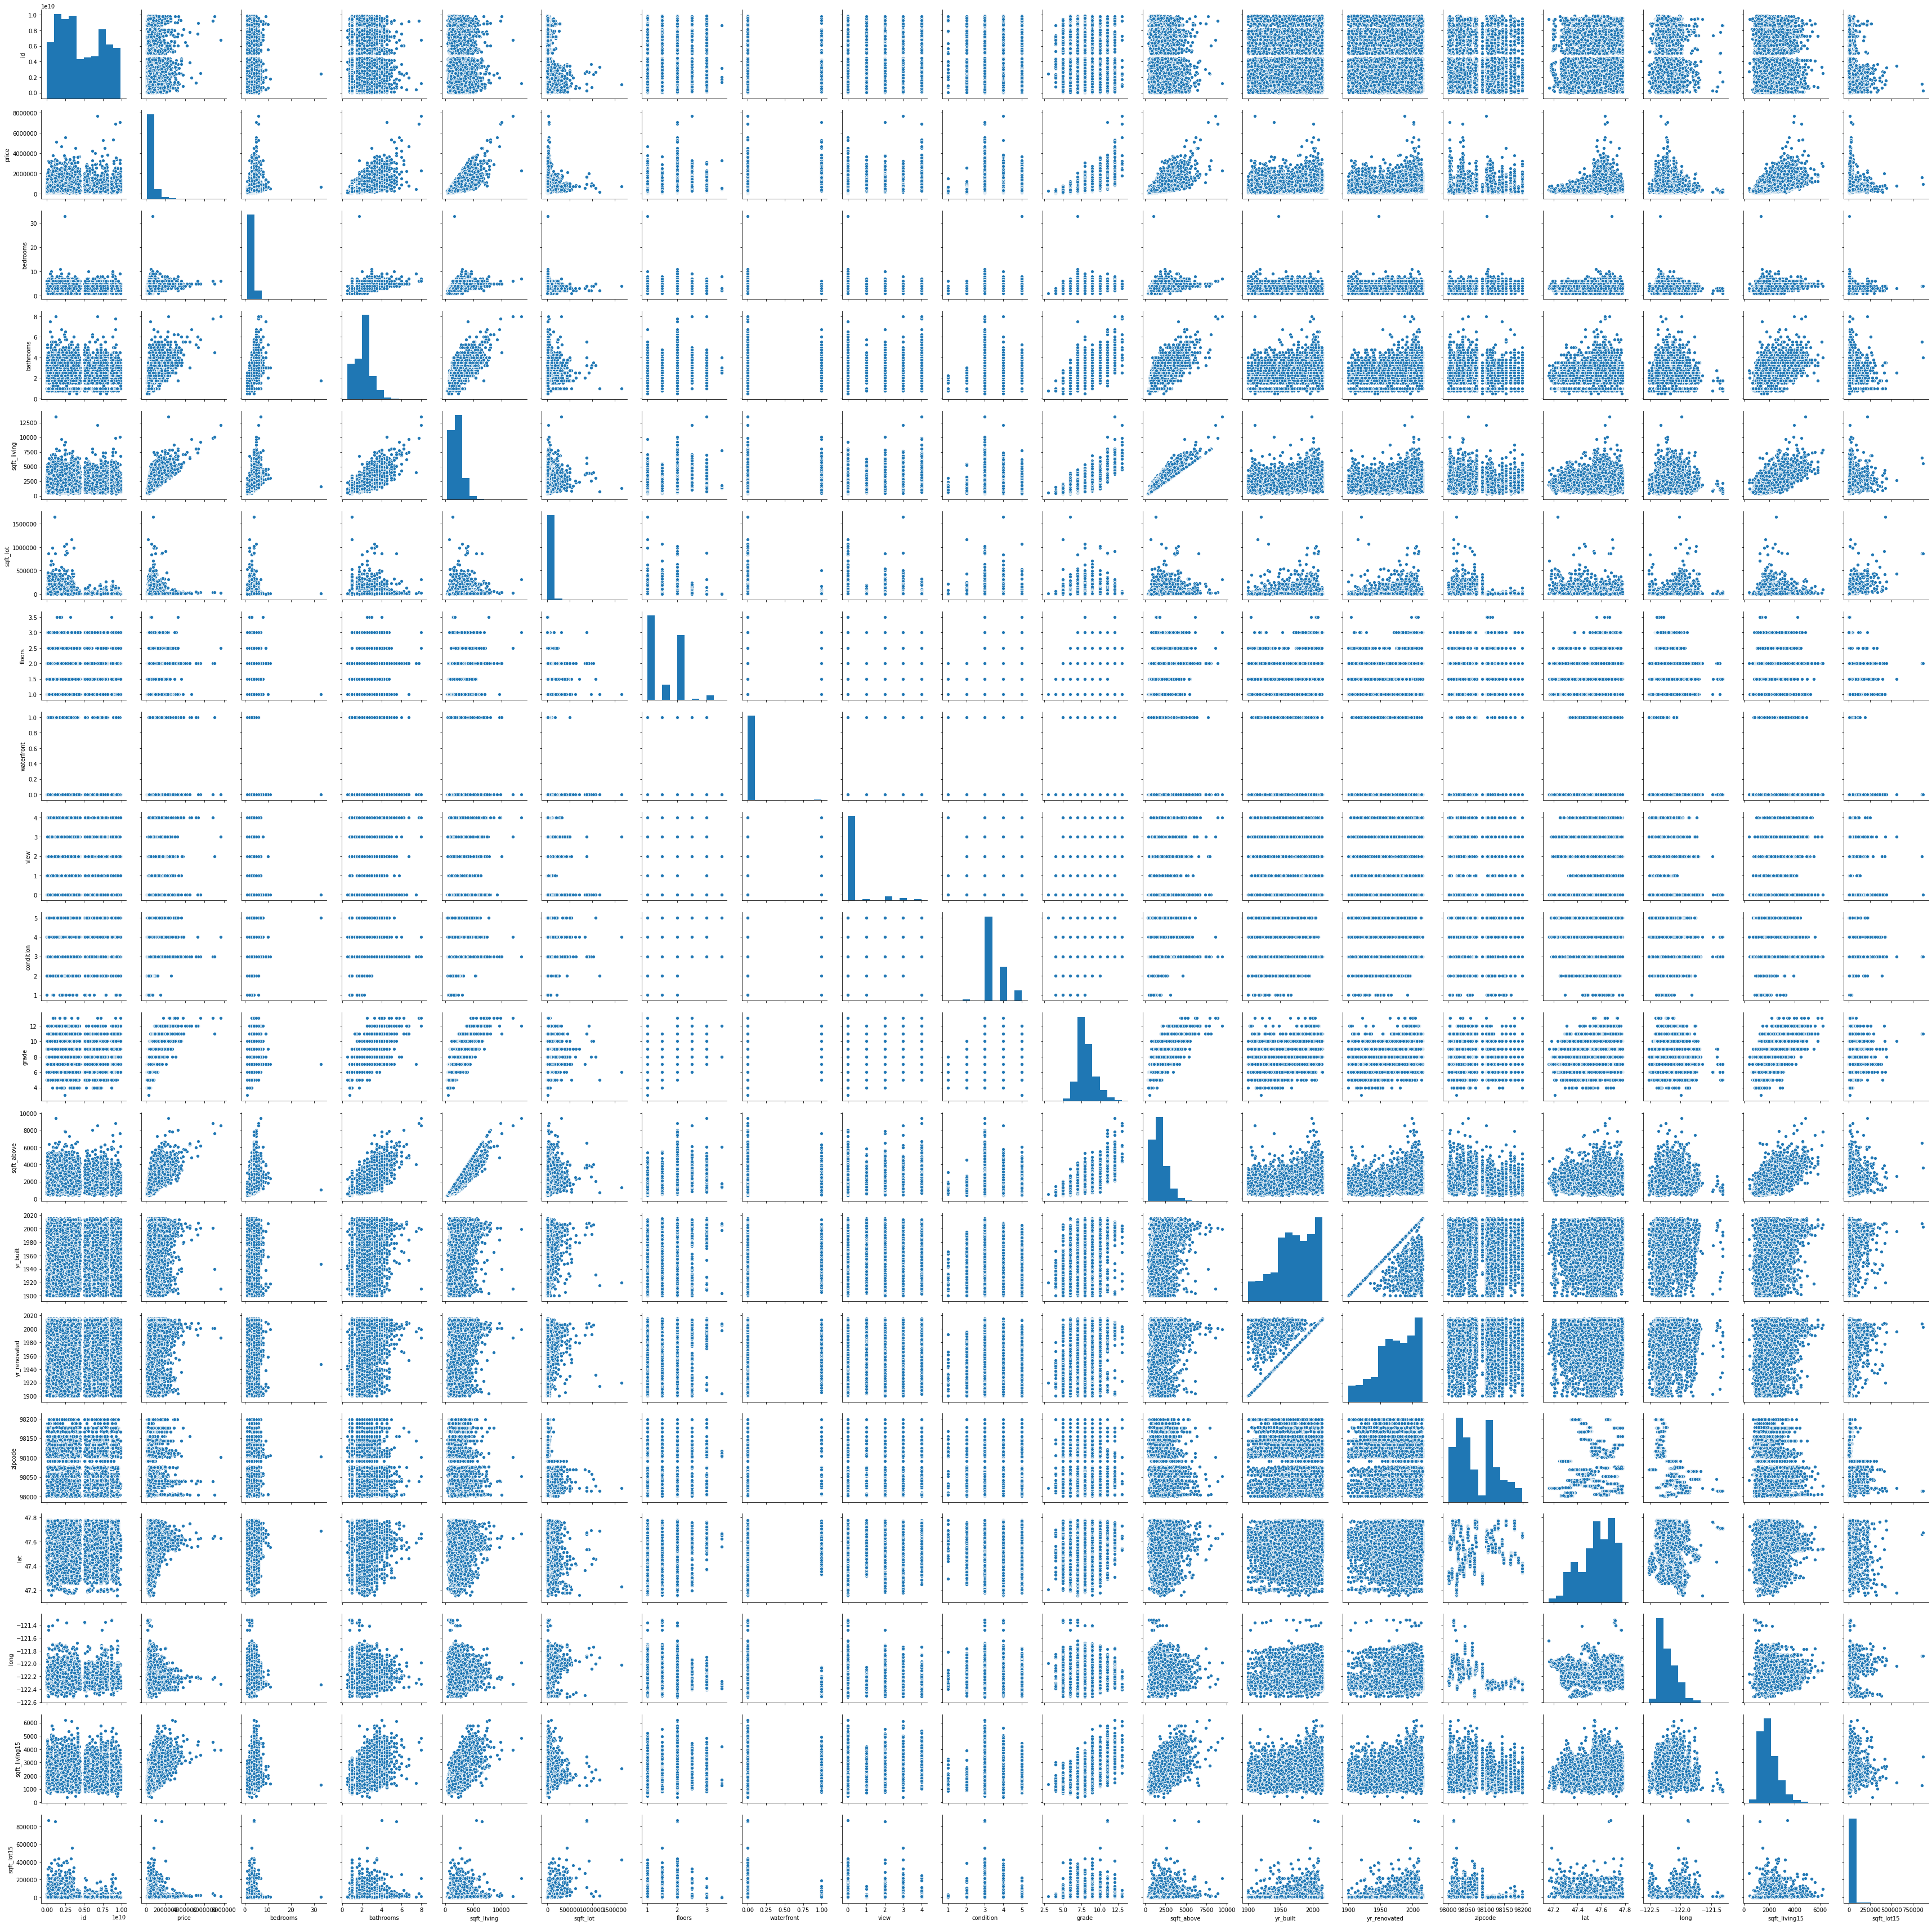

In [12]:
p = sns.pairplot(data)

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated       116
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [ ]:
## saving zipcode, lat, and long into a seperate dataframe for later

In [13]:
location = data[['price', 'bedrooms', 'bathrooms', 'zipcode', 'lat', 'long']]
location.head()

price  bedrooms  bathrooms  zipcode      lat     long
4542   397500.0         3       1.75    98052  47.6991 -122.130
7888   222000.0         3       1.50    98042  47.3683 -122.147
14566  796000.0         4       3.25    98115  47.6769 -122.328
3240   325000.0         3       2.50    98045  47.4639 -121.744
13684  818500.0         5       3.50    98006  47.5469 -122.194

In [14]:
location.to_csv('location.csv', index = False)

## Normalizing

In [12]:
def norm_feat(series):
    return(series-series.mean())/series.std()
for feat in ['bathrooms', 'sqft_living', 'condition', 'yr_built', 'zipcode']:
    data[feat] = norm_feat(data[feat])
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.576200e+04  1.576200e+04  15762.000000  1.576200e+04  1.576200e+04   
mean   4.593364e+09  5.413172e+05      3.378949  1.622861e-17  1.081907e-17   
std    2.876078e+09  3.722258e+05      0.935301  1.000000e+00  1.000000e+00   
min    1.000102e+06  8.200000e+04      1.000000 -2.113793e+00 -1.866405e+00   
25%    2.125159e+09  3.210000e+05      3.000000 -4.835819e-01 -7.124970e-01   
50%    3.905081e+09  4.500000e+05      3.000000  1.685028e-01 -1.790869e-01   
75%    7.334501e+09  6.448750e+05      4.000000  4.945451e-01  5.067262e-01   
max    9.895000e+09  7.700000e+06     33.000000  7.667476e+00  1.247035e+01   

           sqft_lot        floors    waterfront          view     condition  \
count  1.576200e+04  15762.000000  15762.000000  15762.000000  1.576200e+04   
mean   1.528082e+04      1.495147      0.007613      0.229984 -5.770173e-17   
std    4.182288e+04      0.539352      0.086924      0.761324  1.000000e+00   
min    5.200000e+02      1.000000      0.000000      0.000000 -3.697862e+00   
25%    5.048500e+03      1.000000      0.000000      0.000000 -6.301936e-01   
50%    7.602000e+03      1.500000      0.000000      0.000000 -6.301936e-01   
75%    1.072000e+04      2.000000      0.000000      0.000000  9.036408e-01   
max    1.651359e+06      3.500000      1.000000      4.000000  2.437475e+00   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  15762.000000  15762.000000  1.576200e+04  15762.000000  1.576200e+04   
mean       7.663748   1792.775473  2.344133e-17     82.440236  1.667941e-17   
std        1.172238    828.403502  1.000000e+00    397.212626  1.000000e+00   
min        3.000000    370.000000 -2.423958e+00      0.000000 -1.433275e+00   
25%        7.000000   1200.000000 -6.514413e-01      0.000000 -8.341911e-01   
50%        7.000000   1570.000000  1.325564e-01      0.000000 -2.351074e-01   
75%        8.000000   2220.000000  8.824672e-01      0.000000  7.384036e-01   
max       13.000000   9410.000000  1.496031e+00   2015.000000  2.273556e+00   

                lat          long  sqft_living15     sqft_lot15  
count  15762.000000  15762.000000   15762.000000   15762.000000  
mean      47.559177   -122.213520    1990.219579   12900.415556  
std        0.138629      0.140706     684.142495   27977.230059  
min       47.155900   -122.519000     399.000000     659.000000  
25%       47.469200   -122.328000    1490.000000    5100.000000  
50%       47.571000   -122.229000    1846.000000    7620.000000  
75%       47.677400   -122.124000    2370.000000   10107.500000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [51]:
data_bed_bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 4887 to 1166
Data columns (total 8 columns):
date           1748 non-null datetime64[ns]
price          1748 non-null float64
bedrooms       1748 non-null int64
bathrooms      1748 non-null float64
sqft_living    1748 non-null float64
condition      1748 non-null float64
yr_built       1748 non-null float64
zipcode        1748 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 202.9 KB


In [52]:
data_bed_bath.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition',
       'yr_built', 'zipcode'],
      dtype='object')

In [49]:
data_bed_bath.to_csv('data_2bed.csv', index = False) 

In [30]:
feats = ['date', 'price','bedrooms', 'bathrooms', 'sqft_living', 'condition', 'yr_built', 'zipcode']
data_bed_bath = data_bed_bath[feats]
data_bed_bath1 = pd.get_dummies(data_bed_bath, drop_first = True)
data_bed_bath.head()

date      price  bedrooms  bathrooms  sqft_living  condition  \
4887  2014-08-20   952000.0         2   1.371358     6.166172  -0.594771   
19157 2015-03-04   890000.0         2   1.371358     4.997628  -0.594771   
14688 2014-09-15   570000.0         2   1.371358     4.519587   0.855243   
3916  2014-08-11   575000.0         2   1.371358     4.254009  -0.594771   
4555  2015-03-30  1260000.0         2   0.691127     4.068104  -0.594771   

       yr_built   zipcode  
4887   1.051364 -2.163141  
19157  1.432669 -1.163647  
14688  1.536661 -1.716559  
3916   1.155356  1.473316  
4555  -1.375120  0.176100

In [54]:
data = pd.read_csv('data_2bed.csv')
data.head()

date      price  bedrooms  bathrooms  sqft_living  condition  \
0  2014-08-20   952000.0       NaN   1.371358     6.166172  -0.594771   
1  2015-03-04   890000.0       NaN   1.371358     4.997628  -0.594771   
2  2014-09-15   570000.0       NaN   1.371358     4.519587   0.855243   
3  2014-08-11   575000.0       NaN   1.371358     4.254009  -0.594771   
4  2015-03-30  1260000.0       NaN   0.691127     4.068104  -0.594771   

   yr_built   zipcode  
0  1.051364 -2.163141  
1  1.432669 -1.163647  
2  1.536661 -1.716559  
3  1.155356  1.473316  
4 -1.375120  0.176100

In [55]:
# I know all bedrooms are 2 bedrooms so going to replace NaN with 2's 
data['bedrooms'].fillna('2', inplace = True)
data.head()

date      price bedrooms  bathrooms  sqft_living  condition  \
0  2014-08-20   952000.0        2   1.371358     6.166172  -0.594771   
1  2015-03-04   890000.0        2   1.371358     4.997628  -0.594771   
2  2014-09-15   570000.0        2   1.371358     4.519587   0.855243   
3  2014-08-11   575000.0        2   1.371358     4.254009  -0.594771   
4  2015-03-30  1260000.0        2   0.691127     4.068104  -0.594771   

   yr_built   zipcode  
0  1.051364 -2.163141  
1  1.432669 -1.163647  
2  1.536661 -1.716559  
3  1.155356  1.473316  
4 -1.375120  0.176100

In [56]:
data.describe()

price     bathrooms   sqft_living     condition      yr_built  \
count  1.748000e+03  1.748000e+03  1.748000e+03  1.748000e+03  1.748000e+03   
mean   3.819078e+05 -3.251912e-17  1.300765e-16 -1.219467e-16  2.422674e-15   
std    1.639594e+05  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    8.250000e+04 -2.029796e+00 -1.933962e+00 -3.494801e+00 -1.721761e+00   
25%    2.600000e+05 -6.693346e-01 -7.654181e-01 -5.947715e-01 -7.858310e-01   
50%    3.600000e+05 -6.693346e-01 -2.077040e-01 -5.947715e-01 -9.254986e-02   
75%    4.701125e+05  6.911269e-01  5.093570e-01  8.552432e-01  3.580829e-01   
max    1.410000e+06  2.051588e+00  6.166172e+00  2.305258e+00  2.229942e+00   

            zipcode  
count  1.748000e+03  
mean   3.755145e-14  
std    1.000000e+00  
min   -2.269470e+00  
25%   -7.170648e-01  
50%    1.761001e-01  
75%    5.376192e-01  
max    1.941164e+00

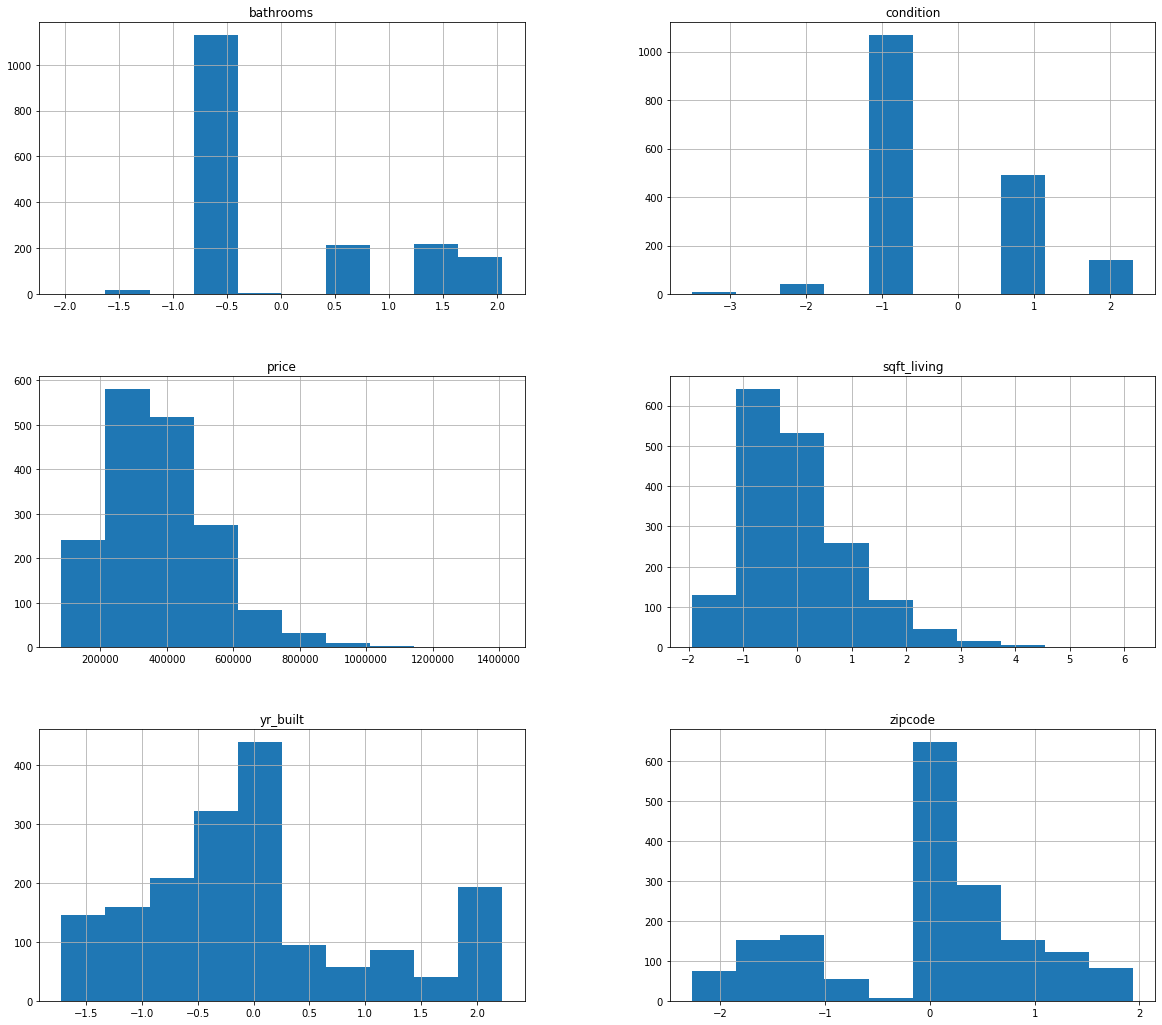

In [57]:
data.hist(figsize = (20,18));

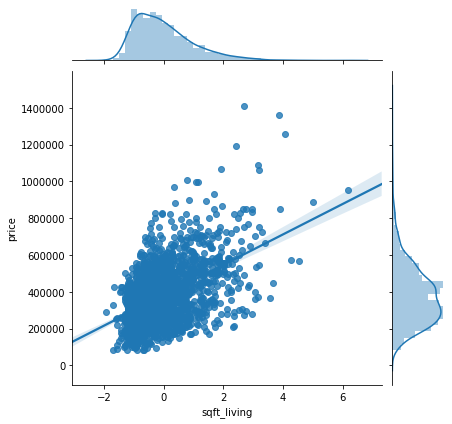

In [58]:
sns.jointplot('sqft_living','price', data=data, kind='reg');

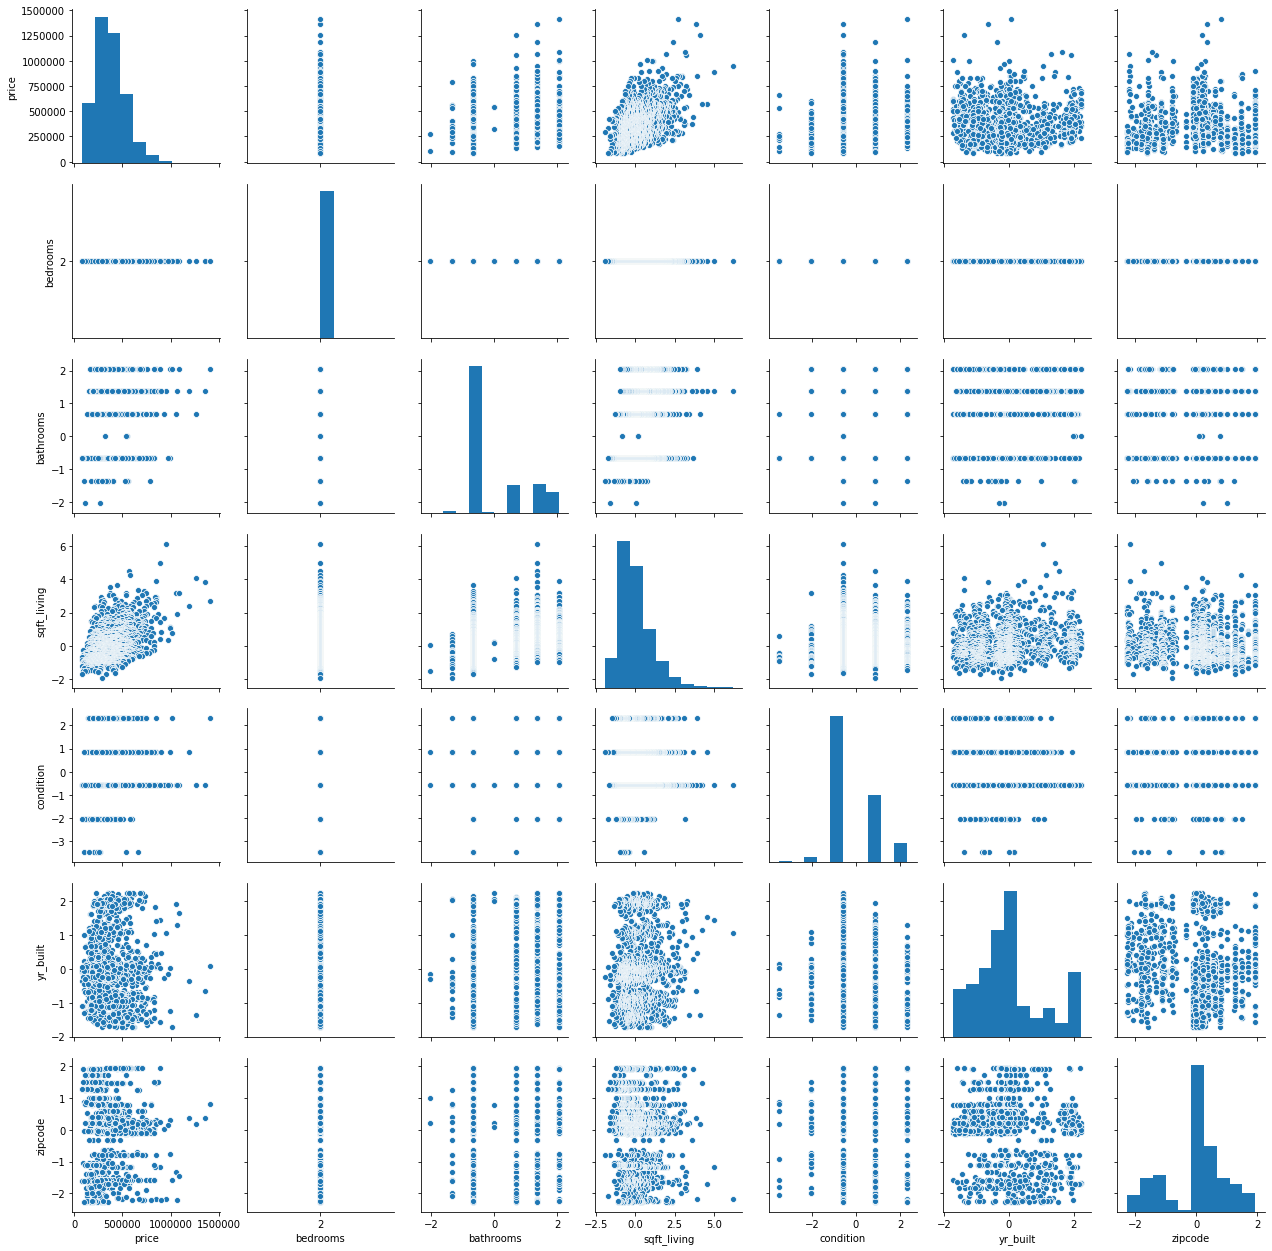

In [59]:
sns.pairplot(data)

In [43]:
feats = ['bathrooms', 'sqft_living', 'condition','zipcode','yr_built']
corr = data[feats].corr()
corr

bathrooms  sqft_living  condition   zipcode  yr_built
bathrooms     1.000000     0.497369  -0.034166 -0.143720  0.416276
sqft_living   0.497369     1.000000   0.020925 -0.109143  0.145647
condition    -0.034166     0.020925   1.000000 -0.052698 -0.242522
zipcode      -0.143720    -0.109143  -0.052698  1.000000 -0.199079
yr_built      0.416276     0.145647  -0.242522 -0.199079  1.000000

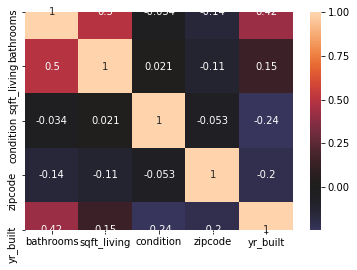

In [44]:
sns.heatmap(corr, center =0, annot= True)

In [45]:
# sqft_living shows a fairly high correlation